
# Project: Investigate a Dataset - [tmdb movies data ]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>

## Introduction

### Dataset Description 


This project is based on a TMDB-movie data set which was sourced from kaggle. This dataset contains valuable information such as the 'id' , 'imdb_id', 'popularity','budget' , 'revenue', 'original_title, 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres',  'production_companies, 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj' , 'revenue_adj' on every movie which are presented under the clearly labelled columns. The dataset is goin to help us explore association and relationship between variables. We are going to rely soley on the TMDB-movie dataset therefore conclusions drawn are tentative.

### Question(s) for Analysis

##We are going to explore a few variable using multi-variate analysis


**1.Does the size of a movie budget contribute to the amount of revenue?**

**2.Does the movie duration / runtime influence the revenue generated from the movie?**

With this project we are therefore using three(3) independent variables :

1. Release_year.
2. runtime.
3. Budget.

with 'REVENUE' been our dependent variable

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>

## Data Wrangling


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movie_dataset = pd.read_csv('tmdb-movies.csv')
movie_dataset.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

**The '.dtypes' code below helps me to check whether any of the columns contains wrong data types.**

In [11]:
movie_dataset.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

__Checking to see if movie dataset contains some missing values.__
code 1 : To check the dimension / shape of my table
code 2 : To check whether some of the columns contain null values

In [12]:
#To check the dimension / shape of my table
movie_dataset.shape[0]

10866

In [13]:
#To check whether some of the columns contain null values
movie_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

**Checking to see the number of zero values present in the two most significant columns that i will be relying on for the analysis.** 

__Code 1 and 2__

Column 1 : budget
Column 2 : revenue

**Making sure the sum of the number of zero values together with the non zero values add up to the total entries expected in the particular columns i.e budget and revenue.**

__Code 3 and 4__

Column 1 : budget
Column 2 : revenue


In [14]:
(movie_dataset['budget'] == 0).sum()

5696

In [15]:
(movie_dataset['revenue'] == 0).sum()

6016

In [16]:
(movie_dataset['budget'] == 0).sum()+(movie_dataset['budget'] > 0).sum() == movie_dataset.shape[0]

True

In [17]:
(movie_dataset['revenue'] == 0).sum()+(movie_dataset['revenue'] > 0).sum() == movie_dataset.shape[0]

True


### Data Cleaning
> 
**Below are the various forms of data cleaning and wrangling i performed on the dataset**

1. check to see if dataset 'id' column contains duplicates and proceed to delete
2. Change the row count to start from 1 and not zero.
3. Drop irrelevant columns (columns which are not relevant to my analysis).
4. Replace zero values with mean of each column.
5. Sort dataset by 'revenue' column.
 

In [18]:
#1. Check to see the number of unique 'id'

movie_dataset['id'].nunique()

10865

In [19]:
#1. Continuation pulling out duplicate "id's" for inspection

ids = movie_dataset["id"]
movie_dataset[ids.isin(ids[ids.duplicated()])].sort_values(by=['id'])

id    imdb_id  popularity    budget  revenue original_title  \
2089  42194  tt0411951     0.59643  30000000   967000         TEKKEN   
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2089  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline  ...  \
2089  Dwight H. Little  Survival is no game  ...   
2090  Dwight H. Little  Survival is no game  ...   

                                               overview runtime  \
2089  In the year of 2039, after World Wars destroy ...      92   
2090  In the year of 2039, after World Wars destroy ...      92   

                                           genres    production_companies  \
2089  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date vote_count  vote_average  release_year  budget_adj  \
2089      3/20/10        110           5.0          2010  30000000.0   
2090      3/20/10        110           5.0          2010  30000000.0   

      revenue_adj  
2089     967000.0  
2090     967000.0  

[2 rows x 21 columns]

In [20]:
#1 Continuation Dropping duplicate row

movie_dataset.drop(2091, inplace=True)

In [21]:
#1 Continuation: Running a code to check whether the row has been deleted
movie_dataset.shape[0]

10865

In [22]:
#2. change the row count to start from 1 and not zero
movie_dataset.index = movie_dataset.index + 1
movie_dataset

id    imdb_id  popularity     budget     revenue  \
1      135397  tt0369610   32.985763  150000000  1513528810   
2       76341  tt1392190   28.419936  150000000   378436354   
3      262500  tt2908446   13.112507  110000000   295238201   
4      140607  tt2488496   11.173104  200000000  2068178225   
5      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10862      21  tt0060371    0.080598          0           0   
10863   20379  tt0060472    0.065543          0           0   
10864   39768  tt0060161    0.065141          0           0   
10865   21449  tt0061177    0.064317          0           0   
10866   22293  tt0060666    0.035919      19000           0   

                     original_title  \
1                    Jurassic World   
2                Mad Max: Fury Road   
3                         Insurgent   
4      Star Wars: The Force Awakens   
5                         Furious 7   
...                             ...   
10862            The Endless Summer   
10863                    Grand Prix   
10864           Beregis Avtomobilya   
10865        What's Up, Tiger Lily?   
10866      Manos: The Hands of Fate   

                                                    cast  \
1      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
2      Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
3      Shailene Woodley|Theo James|Kate Winslet|Ansel...   
4      Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
5      Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
...                                                  ...   
10862  Michael Hynson|Robert August|Lord 'Tally Ho' B...   
10863  James Garner|Eva Marie Saint|Yves Montand|Tosh...   
10864  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...   
10865  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...   
10866  Harold P. Warren|Tom Neyman|John Reynolds|Dian...   

                                                homepage            director  \
1                          http://www.jurassicworld.com/     Colin Trevorrow   
2                            http://www.madmaxmovie.com/       George Miller   
3         http://www.thedivergentseries.movie/#insurgent    Robert Schwentke   
4      http://www.starwars.com/films/star-wars-episod...         J.J. Abrams   
5                               http://www.furious7.com/           James Wan   
...                                                  ...                 ...   
10862                                                NaN         Bruce Brown   
10863                                                NaN  John Frankenheimer   
10864                                                NaN      Eldar Ryazanov   
10865                                                NaN         Woody Allen   
10866                                                NaN    Harold P. Warren   

                                                 tagline  ...  \
1                                      The park is open.  ...   
2                                     What a Lovely Day.  ...   
3                             One Choice Can Destroy You  ...   
4                          Every generation has a story.  ...   
5                                    Vengeance Hits Home  ...   
...                                                  ...  ...   
10862                                                NaN  ...   
10863  Cinerama sweeps YOU into a drama of speed and ...  ...   
10864                                                NaN  ...   
10865                          WOODY ALLEN STRIKES BACK!  ...   
10866       It's Shocking! It's Beyond Your Imagination!  ...   

                                                overview runtime  \
1      Twenty-two years after the events of Jurassic ...     124   
2      An apocalyptic story set in the furthest reach...     120   
3      Beatrice Prior must confront her inner demons ...     119   
4      Thirty years after defeating the Galactic E

In [23]:
#3. Droping irrelevant columns
movie_dataset.drop(['cast', 'homepage', 'tagline', 'keywords','overview' ,'budget_adj', 'revenue_adj' ], axis=1 , inplace=True)

In [24]:
movie_dataset.head()

id    imdb_id  popularity     budget     revenue  \
1  135397  tt0369610   32.985763  150000000  1513528810   
2   76341  tt1392190   28.419936  150000000   378436354   
3  262500  tt2908446   13.112507  110000000   295238201   
4  140607  tt2488496   11.173104  200000000  2068178225   
5  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title          director  runtime  \
1                Jurassic World   Colin Trevorrow      124   
2            Mad Max: Fury Road     George Miller      120   
3                     Insurgent  Robert Schwentke      119   
4  Star Wars: The Force Awakens       J.J. Abrams      136   
5                     Furious 7         James Wan      137   

                                      genres  \
1  Action|Adventure|Science Fiction|Thriller   
2  Action|Adventure|Science Fiction|Thriller   
3         Adventure|Science Fiction|Thriller   
4   Action|Adventure|Science Fiction|Fantasy   
5                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
1  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
2  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
3  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
4          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
5  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year  
1           6.5          2015  
2           7.1          2015  
3           6.3          2015  
4           7.5          2015  
5           7.3          2015

In [25]:
#4 Replacing zero values with median values ('revenue' column) by first changing the zero values to null then to the median
movie_dataset['revenue']=movie_dataset['revenue'].replace(0, np.nan)

In [26]:
movie_dataset.tail()

id    imdb_id  popularity  budget  revenue  \
10862     21  tt0060371    0.080598       0      NaN   
10863  20379  tt0060472    0.065543       0      NaN   
10864  39768  tt0060161    0.065141       0      NaN   
10865  21449  tt0061177    0.064317       0      NaN   
10866  22293  tt0060666    0.035919   19000      NaN   

                 original_title            director  runtime  \
10862        The Endless Summer         Bruce Brown       95   
10863                Grand Prix  John Frankenheimer      176   
10864       Beregis Avtomobilya      Eldar Ryazanov       94   
10865    What's Up, Tiger Lily?         Woody Allen       80   
10866  Manos: The Hands of Fate    Harold P. Warren       74   

                       genres  \
10862             Documentary   
10863  Action|Adventure|Drama   
10864          Mystery|Comedy   
10865           Action|Comedy   
10866                  Horror   

                                    production_companies release_date  \
10862                                  Bruce Brown Films      6/15/66   
10863  Cherokee Productions|Joel Productions|Douglas ...     12/21/66   
10864                                            Mosfilm       1/1/66   
10865                            Benedict Pictures Corp.      11/2/66   
10866                                          Norm-Iris     11/15/66   

       vote_count  vote_average  release_year  
10862          11           7.4          1966  
10863          20           5.7          1966  
10864          11           6.5          1966  
10865          22           5.4          1966  
10866          15           1.5          1966

In [27]:
#4 Continuation: Replacing zero values with median values ('budget' column) by first changing the zero values to null then to the median
movie_dataset['budget']=movie_dataset['budget'].replace(0, np.nan)

In [28]:
revenue_mean = movie_dataset['revenue'].mean()
movie_dataset['revenue'] = movie_dataset['revenue'].fillna(revenue_mean)

In [29]:
budget_mean = movie_dataset['budget'].mean()
movie_dataset['budget'] = movie_dataset['budget'].fillna(budget_mean)

In [30]:
#Running the code below to check that there no more zero values in the 'revenue' column.

(movie_dataset['revenue'] == 0).sum()

0

In [31]:
#Running the code below to check that there no more zero values in the 'budget' column.

(movie_dataset['budget'] == 0).sum()

0

In [32]:
# 5 Sort dataset by 'revenue' column in a descending order

movie_dataset.sort_values(by=['revenue'], ascending=False, inplace=True)
movie_dataset.head()

id    imdb_id  popularity       budget       revenue  \
1387   19995  tt0499549    9.432768  237000000.0  2.781506e+09   
4     140607  tt2488496   11.173104  200000000.0  2.068178e+09   
5232     597  tt0120338    4.355219  200000000.0  1.845034e+09   
4362   24428  tt0848228    7.637767  220000000.0  1.519558e+09   
1     135397  tt0369610   32.985763  150000000.0  1.513529e+09   

                    original_title         director  runtime  \
1387                        Avatar    James Cameron      162   
4     Star Wars: The Force Awakens      J.J. Abrams      136   
5232                       Titanic    James Cameron      194   
4362                  The Avengers      Joss Whedon      143   
1                   Jurassic World  Colin Trevorrow      124   

                                         genres  \
1387   Action|Adventure|Fantasy|Science Fiction   
4      Action|Adventure|Science Fiction|Fantasy   
5232                     Drama|Romance|Thriller   
4362           Science Fiction|Action|Adventure   
1     Action|Adventure|Science Fiction|Thriller   

                                   production_companies release_date  \
1387  Ingenious Film Partners|Twentieth Century Fox ...     12/10/09   
4             Lucasfilm|Truenorth Productions|Bad Robot     12/15/15   
5232  Paramount Pictures|Twentieth Century Fox Film ...     11/18/97   
4362                                     Marvel Studios      4/25/12   
1     Universal Studios|Amblin Entertainment|Legenda...       6/9/15   

      vote_count  vote_average  release_year  
1387        8458           7.1          2009  
4           5292           7.5          2015  
5232        4654           7.3          1997  
4362        8903           7.3          2012  
1           5562           6.5          2015

In [33]:
movie_dataset.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                  float64
revenue                 float64
original_title           object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

In [34]:
#Changing the data types of 'revenue' coulumn from float to int

movie_dataset.revenue = movie_dataset['revenue'].astype('int')

In [35]:
#Changing the data types of 'budget' coulumn from float to int

movie_dataset.budget = movie_dataset['budget'].astype('int')

In [36]:
movie_dataset.head()

id    imdb_id  popularity     budget     revenue  \
1387   19995  tt0499549    9.432768  237000000 -2147483648   
4     140607  tt2488496   11.173104  200000000  2068178225   
5232     597  tt0120338    4.355219  200000000  1845034188   
4362   24428  tt0848228    7.637767  220000000  1519557910   
1     135397  tt0369610   32.985763  150000000  1513528810   

                    original_title         director  runtime  \
1387                        Avatar    James Cameron      162   
4     Star Wars: The Force Awakens      J.J. Abrams      136   
5232                       Titanic    James Cameron      194   
4362                  The Avengers      Joss Whedon      143   
1                   Jurassic World  Colin Trevorrow      124   

                                         genres  \
1387   Action|Adventure|Fantasy|Science Fiction   
4      Action|Adventure|Science Fiction|Fantasy   
5232                     Drama|Romance|Thriller   
4362           Science Fiction|Action|Adventure   
1     Action|Adventure|Science Fiction|Thriller   

                                   production_companies release_date  \
1387  Ingenious Film Partners|Twentieth Century Fox ...     12/10/09   
4             Lucasfilm|Truenorth Productions|Bad Robot     12/15/15   
5232  Paramount Pictures|Twentieth Century Fox Film ...     11/18/97   
4362                                     Marvel Studios      4/25/12   
1     Universal Studios|Amblin Entertainment|Legenda...       6/9/15   

      vote_count  vote_average  release_year  
1387        8458           7.1          2009  
4           5292           7.5          2015  
5232        4654           7.3          1997  
4362        8903           7.3          2012  
1           5562           6.5          2015

In [37]:
movie_dataset.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int32
revenue                   int32
original_title           object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

In [38]:
movie_dataset.head()

id    imdb_id  popularity     budget     revenue  \
1387   19995  tt0499549    9.432768  237000000 -2147483648   
4     140607  tt2488496   11.173104  200000000  2068178225   
5232     597  tt0120338    4.355219  200000000  1845034188   
4362   24428  tt0848228    7.637767  220000000  1519557910   
1     135397  tt0369610   32.985763  150000000  1513528810   

                    original_title         director  runtime  \
1387                        Avatar    James Cameron      162   
4     Star Wars: The Force Awakens      J.J. Abrams      136   
5232                       Titanic    James Cameron      194   
4362                  The Avengers      Joss Whedon      143   
1                   Jurassic World  Colin Trevorrow      124   

                                         genres  \
1387   Action|Adventure|Fantasy|Science Fiction   
4      Action|Adventure|Science Fiction|Fantasy   
5232                     Drama|Romance|Thriller   
4362           Science Fiction|Action|Adventure   
1     Action|Adventure|Science Fiction|Thriller   

                                   production_companies release_date  \
1387  Ingenious Film Partners|Twentieth Century Fox ...     12/10/09   
4             Lucasfilm|Truenorth Productions|Bad Robot     12/15/15   
5232  Paramount Pictures|Twentieth Century Fox Film ...     11/18/97   
4362                                     Marvel Studios      4/25/12   
1     Universal Studios|Amblin Entertainment|Legenda...       6/9/15   

      vote_count  vote_average  release_year  
1387        8458           7.1          2009  
4           5292           7.5          2015  
5232        4654           7.3          1997  
4362        8903           7.3          2012  
1           5562           6.5          2015

<a id='eda'></a>

## Exploratory Data Analysis


### Research Question 1 (Does the size of the movie budget contribute to the amount of revenue?!)

In [39]:
def revenue_scatter(variable):
    "input the variable"
    movie_dataset.plot(x= variable, y='revenue', kind='scatter')

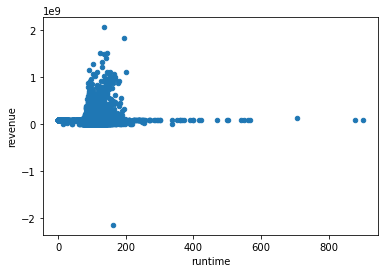

In [40]:
revenue_scatter('runtime')

Looking at the above scatter plot between 'revenue' and 'runtime' we can clearly tell that there is some form of strong correletion that exist between the two variables which is 'revenue' and 'runtime'. This relationship should however not be construed as causation that is to say a longer runtime or movie duration causes revenue to increase.

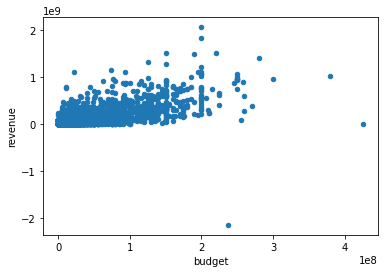

In [41]:
revenue_scatter('budget')

The above scatter plot shows a fairly strong correletion that exist between a particular movie 'budget' and the 'revenue'
This fairly strong relationship does not mean causation. Thus we cannot state categorically that increase in the budget level causes revenue to increase.

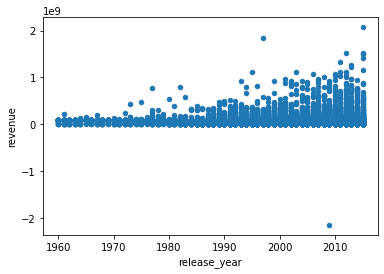

In [42]:
revenue_scatter('release_year')

The scatter plot above between release year and revenue depicts some form of correletion that exist between the two variables. 
This relationship should however not be construed as causation that is to say movies released in current periods have a higher revenue than those release in prior years.

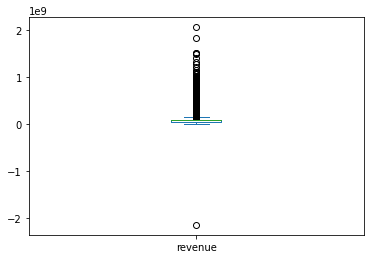

In [43]:
movie_dataset['revenue'].plot(kind='box');

From the box plots above we can notice that there is a single outliers in the 'revenue' column. It is important to note that the negative figure causing the outlier in the 'revenue' box plot is original a positive figure from the dataset uploaded but ended up changing to a negative after my mean imputation step. It should therefore be ignored.

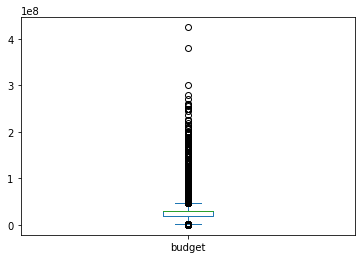

In [44]:
movie_dataset['budget'].plot(kind='box');

From the 'budget' box plots above we can notice that there are some movies with a zero budget figure. These movies which zero budget figure maybe due to unavailable information with regards to the amount (budget) spent on the movie. The are a couple of movies which also have budgets above four billion (4 billion) which is possible depending on the casts, director, costumes used.

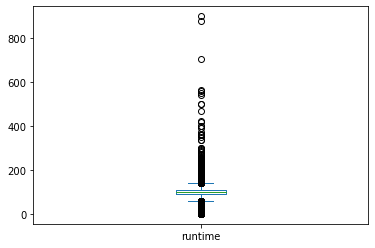

In [45]:
movie_dataset['runtime'].plot(kind='box');

From the box plots above which provides data on the 'runtime' of the movies. We can notice that there are few movies whose 'runtime' are way above and below the mean runtime. The movies with longer 'runtime' can be documentaries or series with movies with below mean 'runtime' been short drama or movie skits.

## Analysis:

So looking at the above scatter plots of the four variables i.e 'revenue', 'budget', 'runtime' and 'release_year' we can clearly tell that there is some form of correletion that exist between each set independent variable (budget, runtime and release year) and the dependent variable which is 'revenue'. 
This relationship should however not be construed as causation that is to say an increase in the budget level causes revenue to increase or an longer runtime of a movie will cause the revenue generated to increase.

Also from the box plots above we can notice that there are a few outliers in both the 'revenue' and 'budget' columns. It is important to note that the negative figure causing the outlier in the 'revenue' box plot is original a positive figure from the dataset uploaded but ended up changing to a negative after my mean imputation step. It should therefore be ignored.


### Limitations In Analysis
From the tmdb-movies dataset there were some columns which contained zero values. The budget and revenue columns had zero values in them which affect my conclusion since majority of my analysis relied on these two columns. I had to use median imputation to fill in the zero values in those two columns. Other columns that also contained zero values include but not limited to 'homepage' , 'genres', 'overview' etc.

### Research Question 1  (Does the size of the budget influence the revenue generated from the movie?)

Clearly there is some form of relation / association between the two variables which can be said to be a fairly strong. This relationship cannot be interpreted as causal in nature ,thus we cannot say an increase in the budget allocation for a movie will cause revenues to increase.

### Research Question 2  (Does the movie duration / runtime influence the revenue generated from the movie?)

The same can also be said for the relationship that exists between the movie runtime and the revenue generated which can be.This relationship cannot be interpreted as causal in nature ,thus we cannot say that lengthy movies cause revenues to shoot up.


<a id='conclusions'></a>
## Conclusions

> It is evident that there exist some relationship between the dependent and independent variables. 
However this is to be taken as relationships but not a causation. We cannot there say that an increase 'budget' spend cause revenue increase neither does the 'duration / runtime' of a movie cause a 'revenue' to increase.


### Limitations

> The 'budget' and 'revenue' columns which contained a significant amount of zero values which i believe is due to lack of available data on those movies had to replaced with the median amounts of their columns. The budget and revenue columns had zero values in them which affected my conclusion since majority of my analysis relied on these two columns. I had to use median imputation to fill in the zero values in those two columns. Other columns that also contained zero values include but not limited to 'homepage' , 'genres', 'overview' etc.
Also certains columns had to be dropped since they had no influence on our data analysis. There was one duplicate 'id' and about ten (10) missing 'imdb_id'.

With the above highlighted issues conclusions drawn are tentative and we may need further and better particulars to make a conclusive judgement. 





**REFERENCES**

changing int to include comma for figures above one thousand : (https://stackoverflow.com/questions/47404472/how-to-insert-a-comma-as-a-thousands-separator-in-a-pandas-dataframe-column) 


For counting zero values in columns:   (https://www.codegrepper.com/code-examples/python/pandas+count+zeros+in+column) 

For sorting by columns:   (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)

Replacing zero values with median:      (https://stackoverflow.com/questions/37506488/python-pandas-dataframe-replace-0-with-median-value)

Start row count from 1 instead of 0: (https://stackoverflow.com/questions/32249960/in-python-pandas-start-row-index-from-1-instead-of-zero-without-creating-additi) 

Replacing zero values with null values: (https://www.codegrepper.com/code-examples/python/how+to+replace+zero+with+null+in+python)

How to get duplicate entries: (https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python)

How to drop specific row:  (https://stackoverflow.com/questions/43136137/drop-a-specific-row-in-pandas) 



In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1